# Úkol 2

## Autoři: Jan Kubát (kubatja3), Jan Matějka (matejj32)


### Importy knihoven

In [1]:
import pandas
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from scipy import stats
from operator import itemgetter
from collections import Counter
import copy

### Výpočet hodnot pro vstupní data 

In [2]:
K = 8
L = len("Kubát")
X = ((K*L*23) % 20) + 1
print("X =", X)

X = 1


### 1. Z datového souboru načtěte text k analýze. Odhadněte pravděpodobnosti písmen (včetně mezer), které se v textu vyskytují. Takto získané empirické rozdělení graficky znázorněte. Pro další body předpokládejme, že je text vygenerován z homogenního markovského řetězce s diskrétním časem.

#### Postup řešení
Tento úkol zahrnuje zpracování textového řetězce ze vstupního souboru a pomocí třídy Counter z knihovny collections získáme četnost jednotlivých znaků v textovém řetězci. Tuto četnost převedeme do DataFramu knihovny pandas a díky ní snadným způsobem a dělením celkového součtu a násobením 100 získáme procentuální četnosti jednotlivých znaků. Množina znaků je tvořena malými písmeny anglické abecedy včetně mezery.

In [3]:
# parsování vstupních souborů
d = list()

with open("hw1-source/" + '{0:03d}'.format(X) + ".txt") as f:
    for line in f:
        d.append(line)

# třída Counter ze vstupního řetězce spočítá četnost jednotlivých znaků
c = Counter(d[1])

# vytvoření datové struktury k pohodlné práci s daty
data_letters = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c.most_common(), key = lambda val : val[0])
                  if True])

suma = sum(data_letters['count'])

# vytvoření DataFramu s procentuální četností jednotlivých znaků
rel_data = copy.deepcopy(data_letters)
rel_data.rename(columns={'count':'percentage'}, inplace=True)
rel_data['percentage'] = (data_letters['count'] / suma) * 100

print("Výčet znaků (včetně mezer) (X) a jejich četnost:")
print(data_letters)

print('\nSoučet počtu písmen řetězce X: ', suma )

Výčet znaků (včetně mezer) (X) a jejich četnost:
    count letter
0    1199       
1     438      a
2      96      b
3     102      c
4     303      d
5     659      e
6     137      f
7     141      g
8     337      h
9     297      i
10     15      j
11     52      k
12    249      l
13    109      m
14    355      n
15    399      o
16     91      p
17      6      q
18    350      r
19    291      s
20    436      t
21    159      u
22     30      v
23    117      w
24      1      x
25     83      y
26      6      z

Součet počtu písmen řetězce X:  6458


In [4]:
print('\nVýčet znaků (včetně mezer) (X) a jejich relativní četnost v (%):')
print(rel_data)


Výčet znaků (včetně mezer) (X) a jejich relativní četnost v (%):
    percentage letter
0    18.566120       
1     6.782286      a
2     1.486528      b
3     1.579436      c
4     4.691855      d
5    10.204398      e
6     2.121400      f
7     2.183338      g
8     5.218334      h
9     4.598947      i
10    0.232270      j
11    0.805203      k
12    3.855683      l
13    1.687829      m
14    5.497058      n
15    6.178383      o
16    1.409105      p
17    0.092908      q
18    5.419635      r
19    4.506039      s
20    6.751316      t
21    2.462063      u
22    0.464540      v
23    1.811706      w
24    0.015485      x
25    1.285228      y
26    0.092908      z


#### Zobrazeni grafu pro hodnotu X

Text(0.5,0,'Letters')

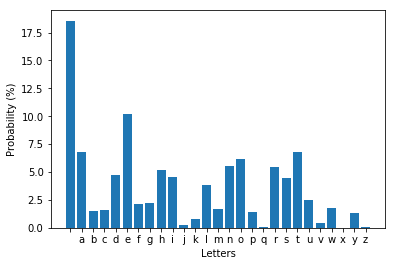

In [5]:
plt.bar(rel_data['letter'], rel_data['percentage'])
plt.ylabel('Probability (%)')
plt.xlabel('Letters')

#### Zobrazení empirického rozdělení pomocí empirické distribuční funkce

Text(0.5,0,'Pravděpodobnost')

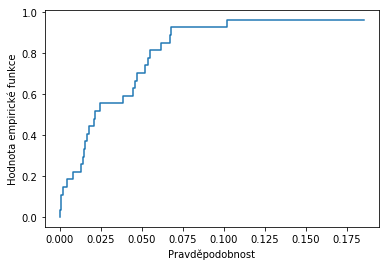

In [6]:
emp = list()

for x in enumerate(rel_data['percentage']):
    emp.append(x[1]/100)
    
x_ax = np.sort(emp)
y_ax = np.arange(len(x_ax))/float(len(x_ax))
plt.step(x_ax, y_ax)
plt.ylabel('Hodnota empirické funkce')
plt.xlabel('Pravděpodobnost')

### 2. Za tohoto předpokladu odhadněte matici přechodu.

#### Postup řešení
Tento úkol zahrnuje zpracování textového řetězce ze vstupního souboru a pomocí posloupnosti znaků v něm, lze tuto posloupnost pojmout jako výčet (množinu) přechodů pro matici přechodů. Pro každý prvek zjistíme jeho následovníka tak, že jím bude znak následující po aktuálním znaku a přičteme jej do matice M. Hodnoty v řádku poté podělíme součtem řádku, který se rovná 1 a tímto způsobem získáme matici přechodů. Pro názornost je matice přechodů zobrazena jako tabulka.

In [7]:
# transformace textového řetězce na list samostatných znaků po sobě jdoucích a mezeru nahradit za "`", 
# aby se snadno počítalo se znaky jako kódy v ASCII
transitions = list(d[1].replace(' ', '`'))

# převedu list znaků na číselnou reprezentaci stavů
T = [(ord(c) - ord('`')) for c in transitions]

# vytvořím matici M tvořenou nulami
M = [[0]*27 for _ in range(27)]

# 
for (i,j) in zip(T,T[1:]):
    M[i][j] += 1

# počet výskytů se díky součtu řádku rovnémmu 1 podělí a tím získáme jejich pravděpodobnost
for row in M:
    n = sum(row)
    if n > 0:
        row[:] = [f/sum(row) for f in row]

# výpis matice přechodů
# print('|'.join('{:5s}'.format(str(x)) for x in range(96, 96+27)))
for row in M: print('|'.join('{0:.3f}'.format(x) for x in row))
    
#TODO: formátování výpisu

0.000|0.125|0.061|0.038|0.048|0.014|0.052|0.019|0.088|0.033|0.013|0.006|0.038|0.036|0.016|0.064|0.039|0.000|0.012|0.065|0.142|0.005|0.008|0.073|0.000|0.007|0.000
0.062|0.000|0.027|0.039|0.066|0.007|0.009|0.027|0.000|0.025|0.000|0.016|0.062|0.014|0.258|0.000|0.011|0.000|0.107|0.078|0.105|0.023|0.007|0.018|0.000|0.039|0.000
0.021|0.104|0.021|0.000|0.000|0.208|0.000|0.000|0.000|0.104|0.000|0.000|0.135|0.000|0.000|0.115|0.000|0.000|0.135|0.000|0.000|0.135|0.000|0.000|0.000|0.021|0.000
0.020|0.157|0.000|0.010|0.000|0.108|0.000|0.000|0.255|0.029|0.000|0.088|0.049|0.000|0.000|0.186|0.000|0.000|0.000|0.000|0.069|0.029|0.000|0.000|0.000|0.000|0.000
0.584|0.036|0.000|0.000|0.007|0.099|0.007|0.000|0.000|0.046|0.000|0.000|0.023|0.000|0.000|0.102|0.000|0.000|0.040|0.036|0.000|0.010|0.003|0.000|0.000|0.007|0.000
0.351|0.068|0.000|0.008|0.097|0.027|0.005|0.006|0.002|0.015|0.000|0.002|0.041|0.014|0.094|0.005|0.006|0.002|0.150|0.055|0.021|0.000|0.006|0.003|0.002|0.023|0.000
0.321|0.058|0.000|0.000|0.00

### 3. Na základě matice z předchozího bodu najděte stacionární rozdělení tohoto řetězce.

### Postup řešení
K řešení této úlohy si vystačíme s funkcí eig z knihovny scipy. Funkce nám pomocí nastavených parametrů left a right umožní zvolit, jestli se jedná o matici na levé nebo pravé straně vzorce v\*A=lambda\*v a na výstupu získat vektor vlastních čísel. Hodnoty na indexu 1 výstupu funkce je matice, kde hodnoty v prvním sloupci podělené součtem všech hodnot této matice na výstupu dávají hodnoty stacionárního rozdělení.

In [8]:
v = linalg.eig(M,left=True,right=False)[1][:,0]
stationary = (v / sum(v))

print("Pi_i\tHodnota Pi_i")
for index, x in enumerate(stationary): print(index, "\t", '{0:.6f}'.format(x.real))
print("\nSoučet prvků stacionárního rozdělení:",sum(stationary.real).round(7))

Pi_i	Hodnota Pi_i
0 	 0.185701
1 	 0.067834
2 	 0.014868
3 	 0.015797
4 	 0.046926
5 	 0.102054
6 	 0.021217
7 	 0.021844
8 	 0.052158
9 	 0.045994
10 	 0.002323
11 	 0.008054
12 	 0.038558
13 	 0.016880
14 	 0.054979
15 	 0.061784
16 	 0.014094
17 	 0.000929
18 	 0.054220
19 	 0.045082
20 	 0.067368
21 	 0.024628
22 	 0.004646
23 	 0.018120
24 	 0.000155
25 	 0.012857
26 	 0.000929

Součet prvků stacionárního rozdělení: 1.0


### 4. Porovnejte stacionární rozdělení se získaným empirickým rozdělením. Tj. na hladině 5% otestujte hypotézu, že se empirické rozdělení z bodu 1 rovná stacionárnímu rozdělení.

#### Postup řešení
K porovnání dvou rozdělení využijeme testu dobré shody pomocí kontinkenční tabulky. Nejprve vytvoříme kontingenční tabulku, která má v prvním řádku 'pravděpodobnost' * 'počet písmen v textu'. Ve druhém řádku je 'Pi_i' * 'počet písmen v textu'. Takto vytvořenou tabulku je ještě třeba upravit, aby v každém políčku bylo alepoň 5. Poté provedeme test dobré shody kontingenční tabulkou pomocí funkce 'chi2_contingency'.


In [9]:
# vytvoření datových struktur pro práci s daty
empiric_list = list()
stationary_list = list()
Z_list = list()

for x in enumerate(rel_data['percentage']):
    empiric_list.append(x[1]/100*suma)

for x in enumerate(stationary):
    stationary_list.append(x[1].real*suma)

cont_matrix = np.matrix([empiric_list,stationary_list])
print("Kontingenční tabulka")

for x in range(0, 27):
    print('{0:.3f}'.format(cont_matrix[0,x]), end='|')

print()
    
for x in range(0, 27):
    print('{0:.3f}'.format(cont_matrix[1,x]), end='|')

print("\n")
    
#Chceme mit alespon 5 v kazdem policku konfing. tabulky
temp_emp_list = list()
temp_stat_list = list()

for i in range (24):
    temp_emp_list.append(cont_matrix[0,i])
    temp_stat_list.append(cont_matrix[1,i])

temp_emp_list.append(cont_matrix[0,25])
temp_stat_list.append(cont_matrix[1,25])

temp_emp_list.append(cont_matrix[0,24]+cont_matrix[0,26])
temp_stat_list.append(cont_matrix[1,24]+cont_matrix[1,26])

cont_matrix_new = np.matrix([temp_emp_list,temp_stat_list])
print("Kontingenční tabulka s alepoň 5 v každém políčku - spojené 'x' a 'z'")

for x in range(0, 26):
    print('{0:.3f}'.format(cont_matrix_new[0,x]), end='|')

print()
    
for x in range(0, 26):
    print('{0:.3f}'.format(cont_matrix_new[1,x]), end='|')

print("\n\n")

print("Test dobré shody: ")
s, p, d, e = stats.chi2_contingency(cont_matrix_new, correction = False)
print("Hodnota testové statistiky: ", s)
print("p-hodnota:", p)
print("\nP-hodnota je nejnižší hodnota, kdy zamítáme H0.")
print("Testujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy " + ("" if 0.05 > p else "NE") + "zamítáme H0.")
print(("Z" if 0.05 > p else "NEz") + "amítáme tedy, že empirické rozdělení se rovná stacionárnímu.")
print("P-hodnota vyšla 1, takže rozdělení jsou si tak podobná, že volba jakékoliv posuzovací hladiny by nulovou hypotézu NEzamítla.")

Kontingenční tabulka
1199.000|438.000|96.000|102.000|303.000|659.000|137.000|141.000|337.000|297.000|15.000|52.000|249.000|109.000|355.000|399.000|91.000|6.000|350.000|291.000|436.000|159.000|30.000|117.000|1.000|83.000|6.000|
1199.260|438.073|96.020|102.017|303.047|659.066|137.019|141.067|336.834|297.030|15.003|52.010|249.007|109.012|355.057|398.998|91.019|6.003|350.150|291.141|435.063|159.048|30.004|117.020|1.000|83.033|6.000|

Kontingenční tabulka s alepoň 5 v každém políčku - spojené 'x' a 'z'
1199.000|438.000|96.000|102.000|303.000|659.000|137.000|141.000|337.000|297.000|15.000|52.000|249.000|109.000|355.000|399.000|91.000|6.000|350.000|291.000|436.000|159.000|30.000|117.000|83.000|7.000|
1199.260|438.073|96.020|102.017|303.047|659.066|137.019|141.067|336.834|297.030|15.003|52.010|249.007|109.012|355.057|398.998|91.019|6.003|350.150|291.141|435.063|159.048|30.004|117.020|83.033|7.001|


Test dobré shody: 
Hodnota testové statistiky:  0.0012033525154421974
p-hodnota: 1.0

P-hodnota